In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
( x_train, y_train ), ( x_test, y_test ) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape( -1, 784  )
x_test = x_test.reshape( -1, 784 )

y_train = tf.keras.utils.to_categorical( y_train, 10 )
y_test = tf.keras.utils.to_categorical( y_test, 10 )
print( x_train.shape, y_train.shape )

(60000, 784) (60000, 10)


In [3]:
class Model:
    def __init__( self, input_dim, ouput_dim,
                 hidden_dims = [ 32, 32 ],
                 use_batchnorm = True,
                 activation_fn = 'relu',
                 optimizer = tf.keras.optimizers.Adam,
                 loss = 'categorical_crossentropy',
                 lr = 0.01):
        '''
        input_dim : tuple or list
        '''
        
        self.model = tf.keras.Sequential()
        
        for h_dim in  hidden_dims:
            self.model.add( layers.Dense( h_dim, activation_fn,
                                         input_shape = input_dim ) )
            if ( use_batchnorm ):
                self.model.add( layers.BatchNormalization() )
        self.model.add( layers.Flatten() )
        self.model.add( layers.Dense( output_dim, 'softmax' ))
        
        self.model.compile( optimizer( lr ),  loss, [ 'accuracy' ] )
        
        
    def train( self, X, Y, batch_size = None, epochs = 1 ):
        return ( self.model.fit( X, Y, batch_size, epochs ) )
        
        
    def evaluate( self, X, Y ):
        return ( self.model.evaluate( X, Y ) )

In [4]:
input_dim = ( 784, )
output_dim = 10
N = 55000

bn = Model( input_dim, output_dim, use_batchnorm = True )
nn = Model( input_dim, output_dim, use_batchnorm = False )

In [5]:
epoch_n = 10
batch_size = 32

In [6]:
bn_his = bn.train( x_train, y_train, batch_size, epoch_n )

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2956 - accuracy: 0.9097
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1917 - accuracy: 0.9421
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1658 - accuracy: 0.9497
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1494 - accuracy: 0.9537
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1344 - accuracy: 0.9587
Epoch 6/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1274 - accuracy: 0.9605
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1207 - accuracy: 0.9623
Epoch 8/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1131 - accuracy: 0.9651
Epoch 9/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1087 - accuracy: 0.9671
Epoch 10/10
60

In [7]:
nn_his = nn.train( x_train, y_train, batch_size, epoch_n )

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3041 - accuracy: 0.9082
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2106 - accuracy: 0.9393
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1886 - accuracy: 0.9465
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1803 - accuracy: 0.9488
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1713 - accuracy: 0.9520
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1629 - accuracy: 0.9538
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1614 - accuracy: 0.9553
Epoch 8/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1524 - accuracy: 0.9573
Epoch 9/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1502 - accuracy: 0.9580
Epoch 10/10
60

In [8]:
bn.evaluate( x_test, y_test )

10000/10000 [==============================] - 1s 51us/sample - loss: 0.1183 - accuracy: 0.9646


[0.11828150636809878, 0.9646]

In [9]:
nn.evaluate( x_test, y_test )

10000/10000 [==============================] - 0s 46us/sample - loss: 0.2159 - accuracy: 0.9466


[0.2159280019056052, 0.9466]

In [10]:
def plot_compare( loss_list, ylim = None, title = None ):
    loss_list = list( loss_list )
    bn = [ i[0] for i in loss_list ]
    nn = [ i[1] for i in loss_list ]
    
    plt.figure( figsize = ( 15, 10 ) )
    plt.plot( bn, label = 'With BN' )
    plt.plot( nn, label = 'Without BN' )
    if ylim:
        plt.ylim( ylim )
    if title:
        plt.title( title )
        
    plt.legend()
    plt.grid( 'on' )
    plt.show()

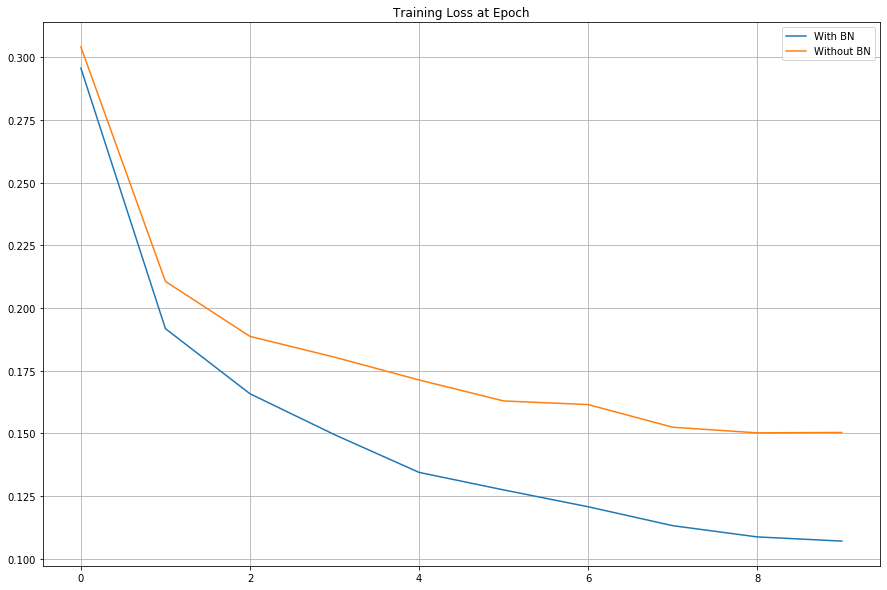

In [11]:
plot_compare( zip( bn_his.history.get( 'loss' ), nn_his.history.get( 'loss' ) ),
            title = 'Training Loss at Epoch' )

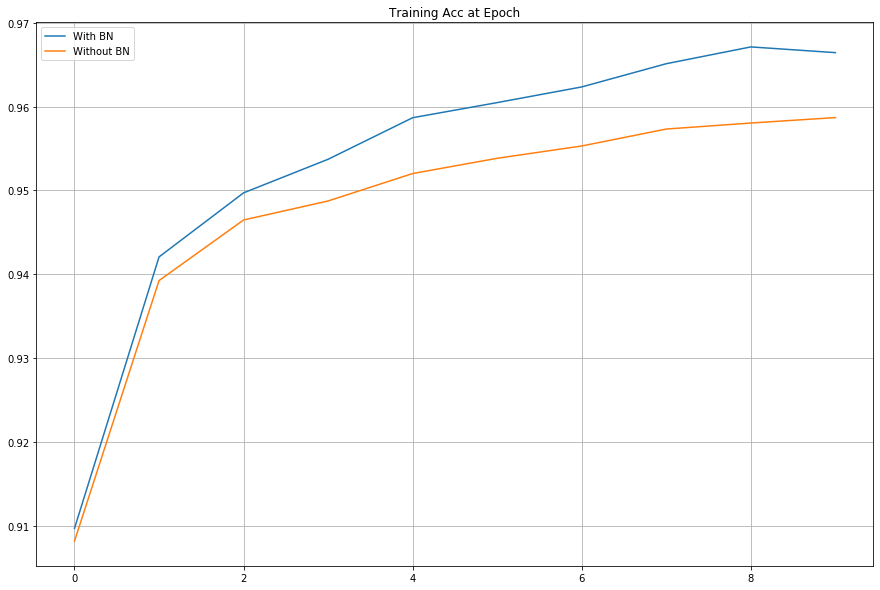

In [12]:
plot_compare( zip( bn_his.history.get( 'accuracy' ), nn_his.history.get( 'accuracy' ) ),
            title = 'Training Acc at Epoch' )